<a href="https://colab.research.google.com/github/2303A52083/23CSBTB39-AIML/blob/main/AIML_A10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

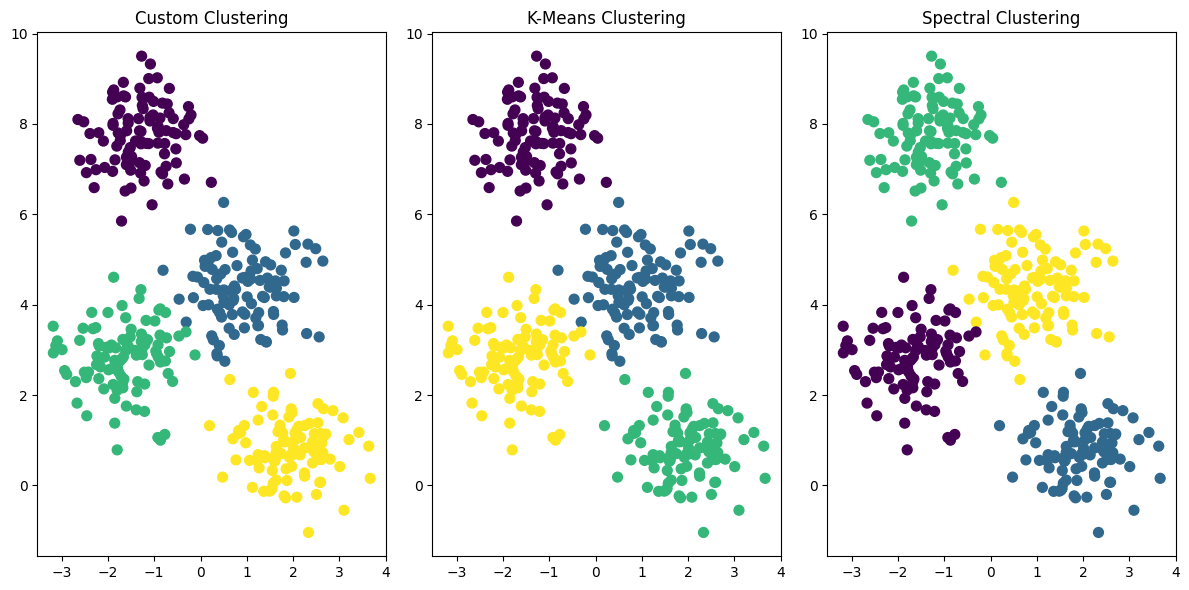

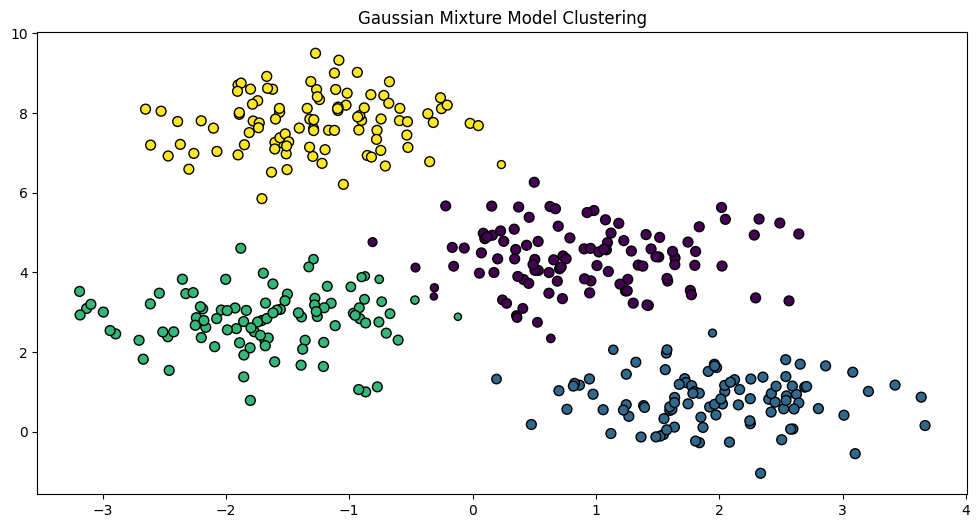

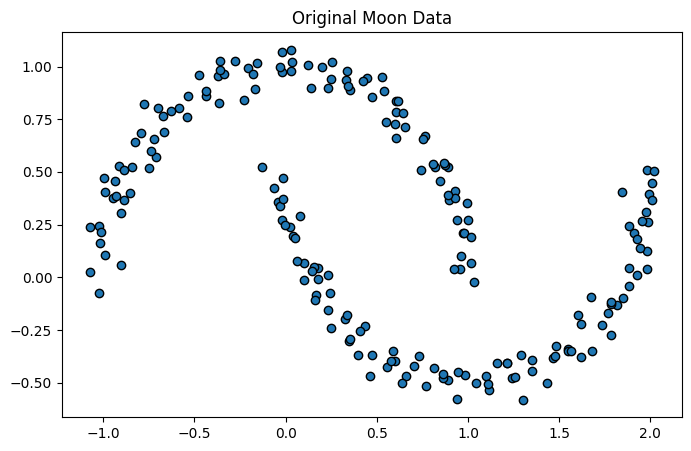

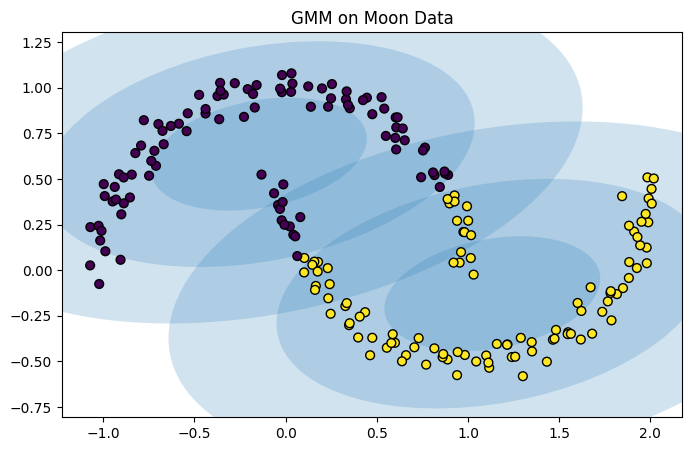

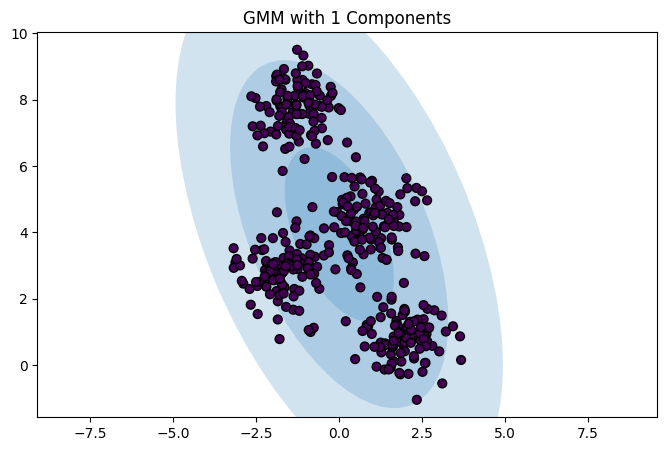

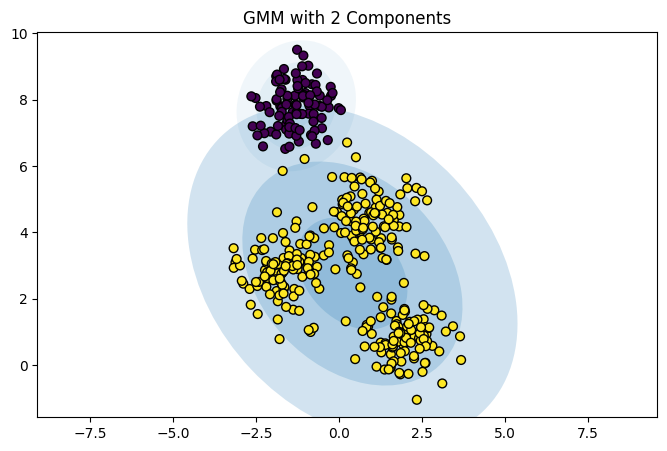

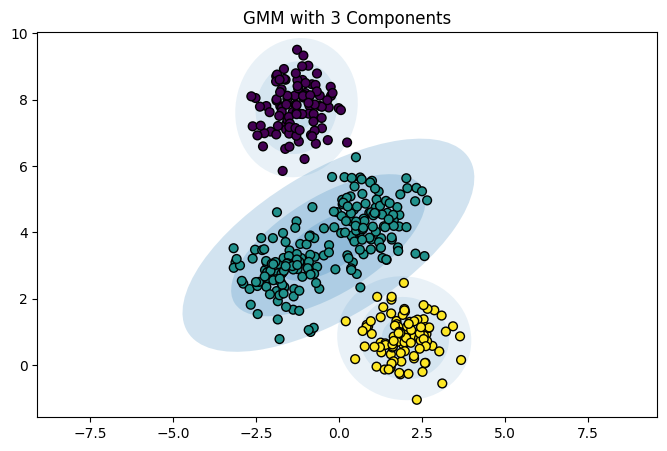

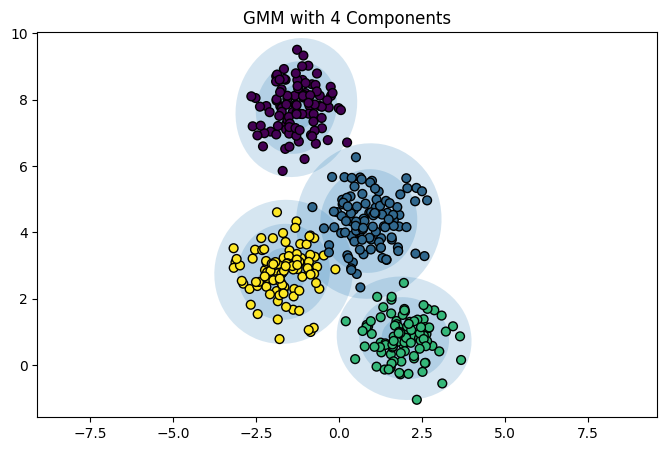

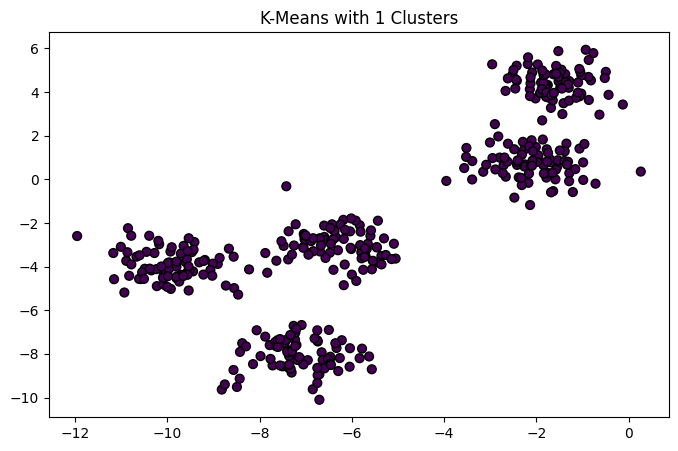

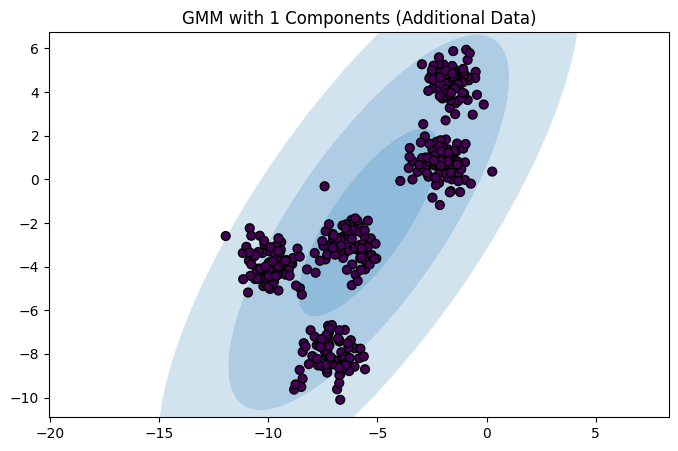

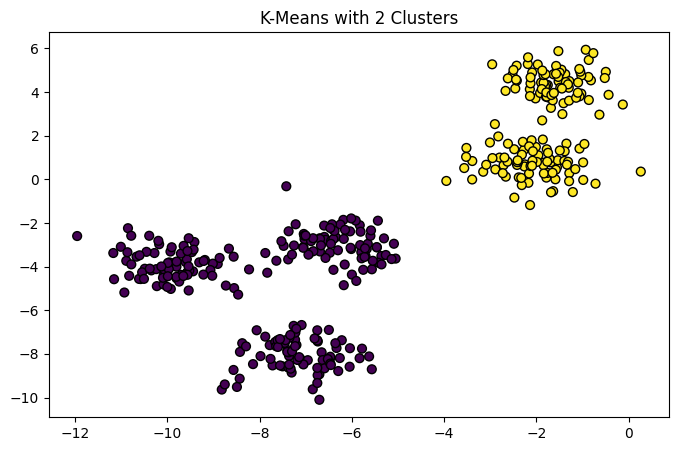

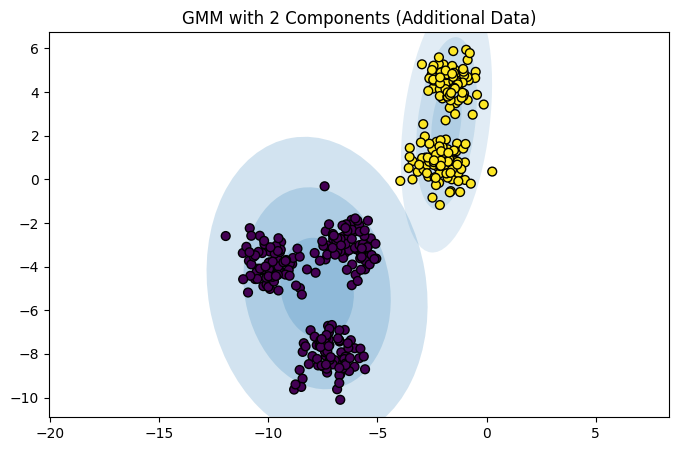

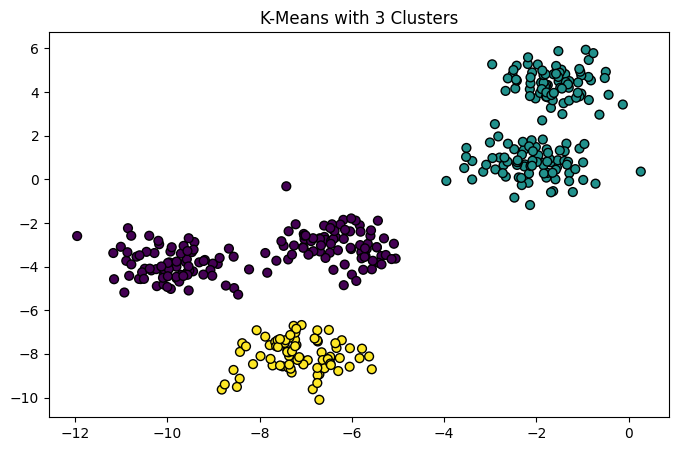

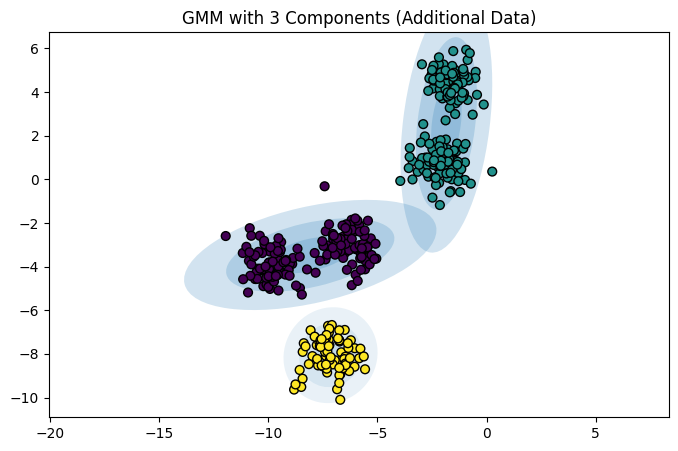

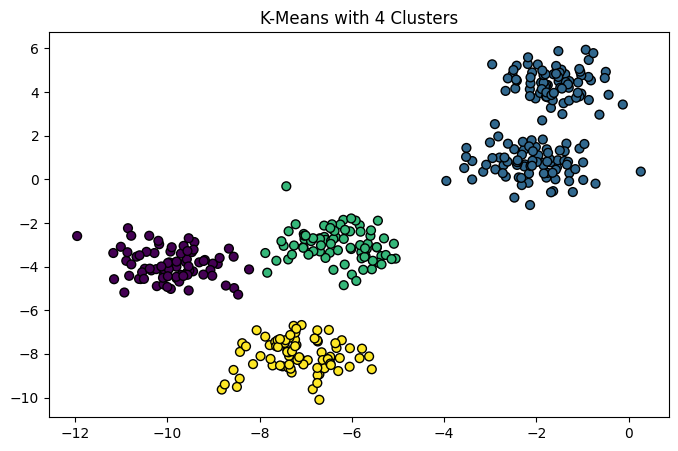

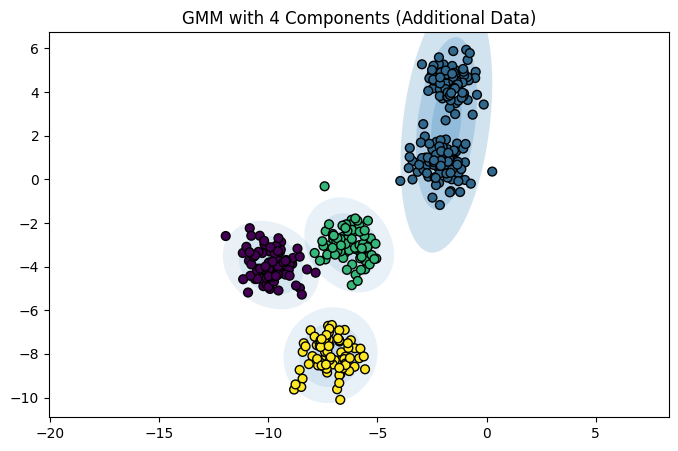

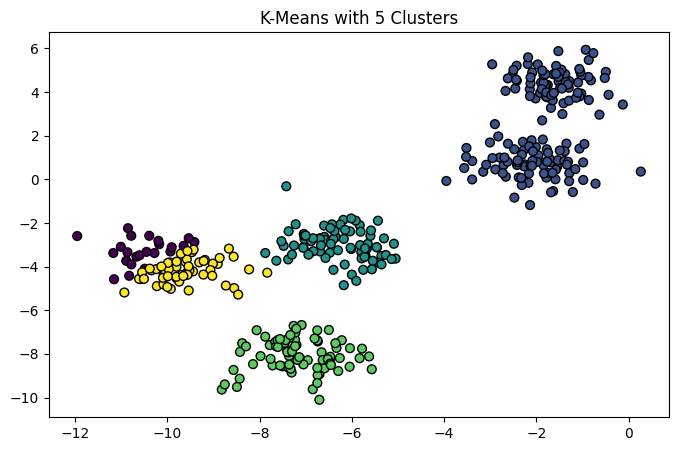

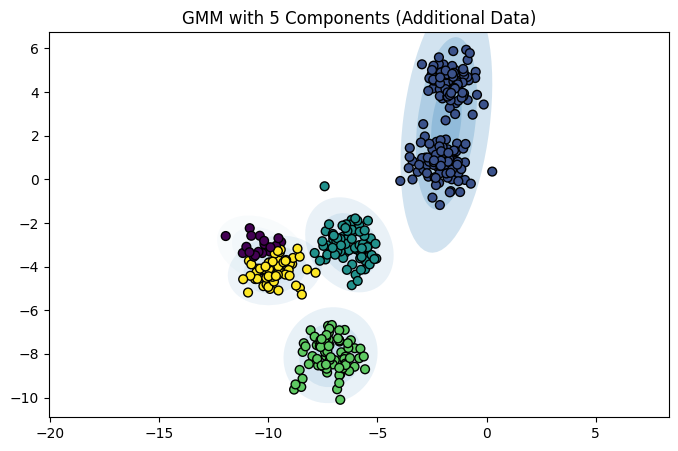

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances_argmin
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
centers, labels = find_clusters(X, 4)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('Custom Clustering')
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=50, cmap='viridis')
plt.title('K-Means Clustering')
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = model.fit_predict(X)
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, s=50, cmap='viridis')
plt.title('Spectral Clustering')
plt.tight_layout()
plt.show()
gmm = GaussianMixture(n_components=4).fit(X)
labels_gmm = gmm.predict(X)
probs = gmm.predict_proba(X)
plt.figure(figsize=(12, 6))
size = probs.max(1)
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, edgecolor='k', cmap='viridis', s=size)
plt.title('Gaussian Mixture Model Clustering')
plt.show()
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, cmap='viridis', edgecolor='k')
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
Xmoon, ymoon = make_moons(200, noise=0.05, random_state=0)
plt.figure(figsize=(8, 5))
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], edgecolor='k')
plt.title('Original Moon Data')
plt.show()
gmm_moon = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8, 5))
plot_gmm(gmm_moon, Xmoon)
plt.title('GMM on Moon Data')
plt.show()
for n_components in range(1, 5):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    plt.figure(figsize=(8, 5))
    plot_gmm(gmm, X)
    plt.title(f'GMM with {n_components} Components')
    plt.show()
X_additional, _ = make_blobs(n_samples=400, centers=5, cluster_std=0.7, random_state=1)
for n_components in range(1, 6):
    kmeans = KMeans(n_clusters=n_components, random_state=0)
    plt.figure(figsize=(8, 5))
    plt.scatter(X_additional[:, 0], X_additional[:, 1], c=kmeans.fit_predict(X_additional), s=40, edgecolor='k')
    plt.title(f'K-Means with {n_components} Clusters')
    plt.show()

    gmm = GaussianMixture(n_components=n_components, random_state=0)
    plt.figure(figsize=(8, 5))
    plot_gmm(gmm, X_additional)
    plt.title(f'GMM with {n_components} Components (Additional Data)')
    plt.show()
